# Proyecto Mecánica Estadística Computacional 
# Esteban Porras Marín C26021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Se quiere simular el modelo de lattice-gas mediante técnicas de Monte-Carlo, para esto definimos los siguientes parámetros a utilizar:

In [ ]:
# Parámetros
L = 8 # Tamaño de la grilla
T = np.linspace(0.1,15.0,100) # Rango de temperaturas
epsilon = 1.0 # Energía de interacción
kb = 1.0 # Constante de boltzmann J/K
mu = 1.0 # Potencial químico

E_0 = np.random.choice([0,1], size=(L,L)) # Configuración inicial aleatoria

Para esto usamos el Hamiltoniano normalmente usado para este modelo:

In [3]:
def Hamiltoniano(Ei, mu, epsilon): # Cálculo del Hamiltoniano
    Lx, Ly = Ei.shape 
    H = 0.0 
    for i in range(Lx):
        for j in range(Ly):
            H += -epsilon * Ei[i,j] * Ei[(i+1) % Lx, j] # Interacción con el vecino inferior
            H += -epsilon * Ei[i,j] * Ei[i ,(j+1) % Ly] # Interacción con el vecino derecho
            H += -mu * Ei[i,j]
            # Hago % Lx debido a que quiero condiciones de frontera periódicas
    return H

Ocupamos un delta E 

In [4]:
def delta_E(Ei, i, j, epsilon, mu):
    n_ij = Ei[i, j]
    Lx, Ly = Ei.shape

    # Vecinos 
    n_up    = Ei[(i-1) % Lx, j] # vecino abajo
    n_down  = Ei[(i+1) % Lx, j] # vecino arriba
    n_left  = Ei[i, (j-1) % Ly] # vecino izquierda
    n_right = Ei[i, (j+1) % Ly] # vecino derecha

    vecinos = n_up + n_down + n_left + n_right

    # Cambio de energía si se flipa el sitio
    deltaE = epsilon * (2*n_ij - 1) * vecinos + mu * (2*n_ij - 1)
    return deltaE

Definimos la función metropolis como:

In [5]:
def metropolis(Ei, T, mu, epsilon):
    Lx, Ly = Ei.shape
    for intento in range(Lx * Ly):
        # Elegir un sitio aleatorio
        i = np.random.randint(0, Lx)
        j = np.random.randint(0, Ly)

        # Calcular el cambio de energía
        dE = delta_E(Ei, i, j, epsilon, mu)

        # Criterio de Metropolis
        if dE <= 0:
            Ei[i,j] = 1 - Ei[i,j] 
        else:
            # Aceptar de acuerdo a la probabilidad de Boltzmann
            prob = np.exp(-dE / (kb * T))
            if np.random.rand() < prob:
                Ei[i,j] = 1 - Ei[i,j]

    return Ei

In [6]:
def verificar_deltaE(Ei, mu, epsilon, n_pruebas=5):
    for _ in range(n_pruebas):
        # Elegir un sitio aleatorio
        Lx, Ly = Ei.shape
        i = np.random.randint(0, Lx)
        j = np.random.randint(0, Ly)

        # Calcular energía total antes
        E_vieja = Hamiltoniano(Ei, mu, epsilon)

        # Calcular deltaE local
        dE_local = delta_E(Ei, i, j, epsilon, mu)

        # Flipa el sitio (0 ↔ 1)
        Ei[i, j] = 1 - Ei[i, j]

        # Calcular energía total nueva
        E_nueva = Hamiltoniano(Ei, mu, epsilon)

        # ΔE global
        dE_global = E_nueva - E_vieja

        # Volver a dejar el sitio como estaba
        Ei[i, j] = 1 - Ei[i, j]

        print(f"Sitio ({i},{j}) → ΔE_local = {dE_local:.6f}, ΔE_global = {dE_global:.6f}")

verificar_deltaE(np.copy(E_0), mu, epsilon)


Sitio (3,3) → ΔE_local = 2.000000, ΔE_global = 2.000000
Sitio (1,5) → ΔE_local = -2.000000, ΔE_global = -2.000000
Sitio (3,4) → ΔE_local = 3.000000, ΔE_global = 3.000000
Sitio (7,4) → ΔE_local = 0.000000, ΔE_global = 0.000000
Sitio (7,4) → ΔE_local = 0.000000, ΔE_global = 0.000000


Entonces calculamos:

[[0 1 0 1 1 1 1 0]
 [1 0 1 0 1 0 1 0]
 [1 0 0 1 1 0 1 0]
 [0 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 0 1]
 [1 1 0 0 0 1 1 1]
 [1 1 1 0 0 1 1 0]
 [1 1 0 0 1 0 0 0]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


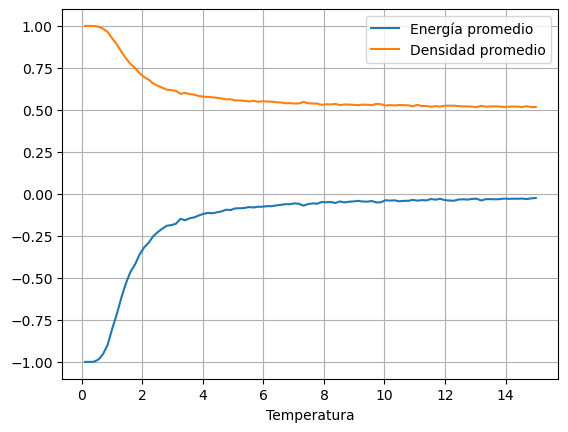

In [ ]:
E_vals = [] # Valores de la energía promedio
rho_vals = [] # Valores de la densidad promedio

print(E_0)
Ei = np.copy(E_0)
for t in range(T.size):
    print(t)
    # Se debe llegar al estado estacionario
    for _ in range(200):
        Ei = metropolis(Ei, T[t], mu, epsilon)
    E_total = 0
    rho_total = 0
    N_medidas = 700
    
    for _ in range(N_medidas):
        Ei = metropolis(Ei, T[t], mu, epsilon)
        E_total += Hamiltoniano(Ei, mu, epsilon) / (L*L)
        rho_total += np.mean(Ei)
    
    E_prom = E_total / N_medidas
    rho_prom = rho_total / N_medidas
    
    E_vals.append(E_prom)
    rho_vals.append(rho_prom)

plt.plot(T, E_vals, label="Energía promedio")
plt.plot(T, rho_vals, label="Densidad promedio")
plt.xlabel("Temperatura")
plt.legend()
plt.grid()
plt.show()


Ahora hallaremos Cv

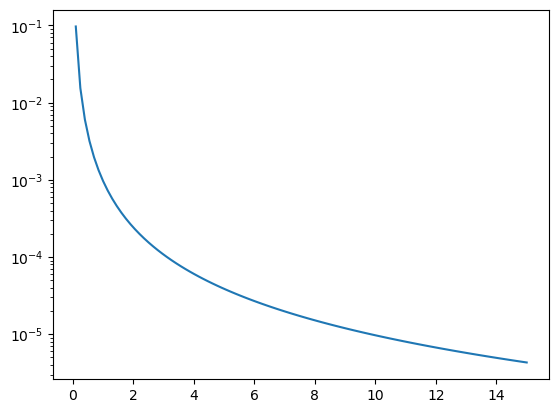

In [ ]:
Cv_vals = np.zeros(T.size) # Valores de la capacidad calorífica
for t in range(T.size):
    E_mean = np.mean(E_vals)
    E2_mean = np.mean(np.square(E_vals))
    Cv_vals[t] = (E2_mean - E_mean**2) / (kb * T[t]**2 * L * L)

plt.plot(T, Cv_vals, label="Capacidad calorífica $C_v$")    

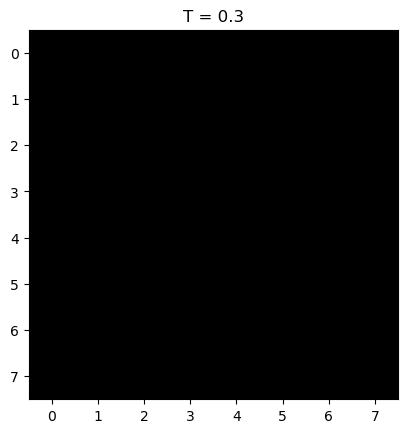

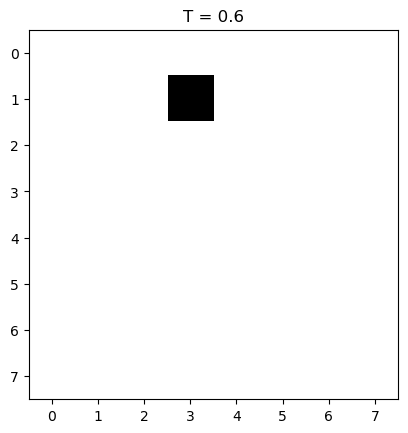

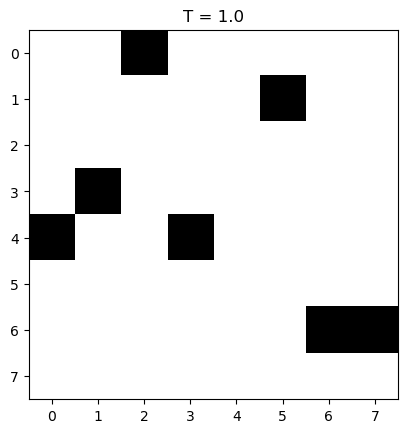

In [16]:
for T_test in [0.3, 0.6, 1.0]:
    Ei = np.random.choice([0,1], (L,L))
    for _ in range(1000):
        Ei = metropolis(Ei, T_test, mu, epsilon)
    plt.imshow(Ei, cmap='gray')
    plt.title(f"T = {T_test}")
    plt.show()
